The angles of each joints are :  [0.0, 2.1980012958374994e-08, -0.1396584855291484, 0.15283710314562668, 0.0]
Computed position: [1.41937327e-01 2.85602413e-09 2.04960557e-01], original position : [0.142, 0.0, 0.205]
Computed position (readable) : ['0.14', '0.00', '0.20']


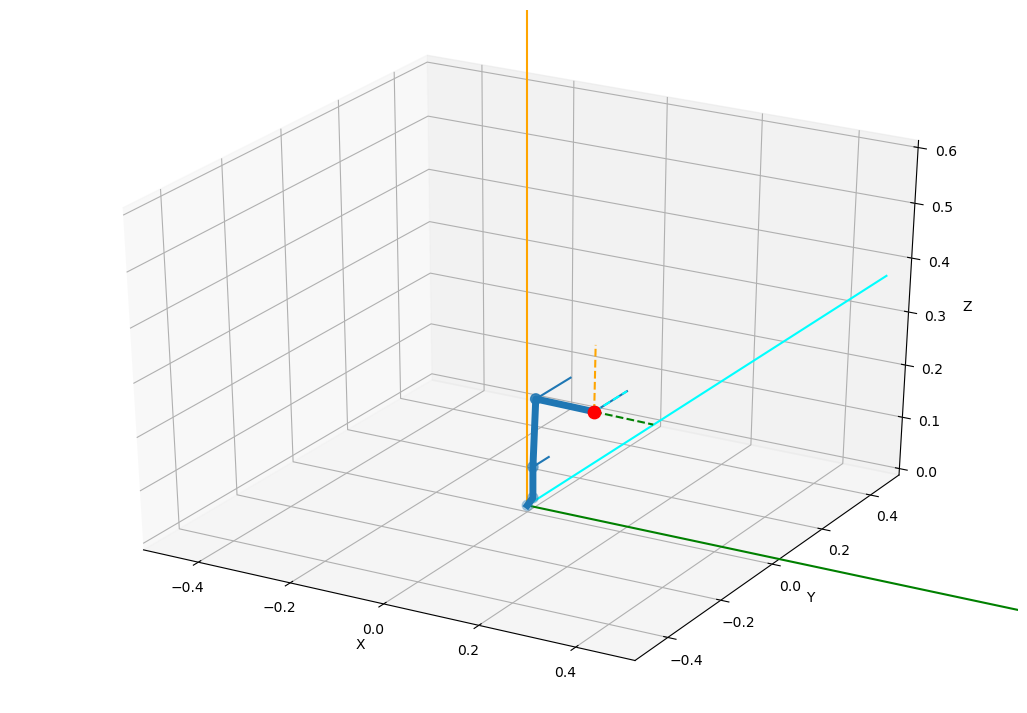

In [14]:


import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets
import serial

def inversa():

    my_chain = ikpy.chain.Chain.from_urdf_file("hola.urdf",active_links_mask=[False,True,True,True,True])

    target_position = [ 0.142, 0.0, 0.205]
    target_orientation = [0, 0, 0]

    ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
    print("The angles of each joints are : ",ik.tolist())

    computed_position = my_chain.forward_kinematics(ik)
    print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
    print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

    
    import matplotlib.pyplot as plt
    fig, ax = plot_utils.init_3d_figure()
    fig.set_figheight(9)  
    fig.set_figwidth(13)  
    my_chain.plot(ik, ax, target=target_position)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)
    ax.set_zlim(0, 0.6)
    #ax.view_init(elev=0, azim=90)
    plt.ion()

inversa()